# Treinando uma Rede Neural para Classificar Imagens Fashion MNIST:

Descrição do Dataset:
O conjunto de dados utilizado neste projeto é o Fashion MNIST, uma versão modificada do popular MNIST. Ele consiste em imagens em escala de cinza (grayscale) de roupas, sapatos e acessórios em um formato de 28x28 pixels.

O conjunto de dados Fashion MNIST contém um total de 70.000 imagens, divididas em 60.000 para treinamento e 10.000 para teste. As imagens estão associadas a rótulos que representam a categoria de cada peça de vestuário ou acessório. Existem 10 categorias diferentes no conjunto de dados, cada uma representando um tipo de item de moda.

O objetivo deste projeto é treinar uma rede neural para classificar corretamente as imagens do Fashion MNIST em uma dessas 10 categorias com alta precisão, utilizando técnicas de aprendizado profundo e visão computacional. A métrica-chave para avaliar o desempenho do modelo é a acurácia, que mede a proporção de previsões corretas em relação ao total de previsões. O modelo alcançou uma acurácia de aproximadamente 90.75% nos dados de teste, indicando sua eficácia na tarefa de classificação.

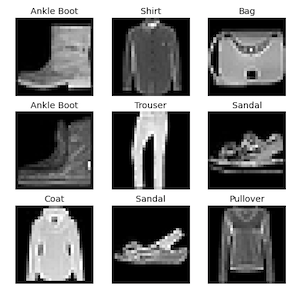

In [1]:
import keras
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Pré-processamento dos Dados:
Aqui, estamos pré-processando os dados para prepará-los para o treinamento de uma rede neural convolucional (CNN).

In [2]:
x_train = x_train.reshape((60000, 28, 28))
x_test = x_test.reshape((10000, 28, 28))

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Nesta etapa, criamos uma CNN para classificar imagens Fashion MNIST. A CNN possui camadas de convolução, pooling, achatamento e densas, sendo eficaz na extração de recursos e na classificação de peças de vestuário. A camada final utiliza a função 'softmax' para produzir previsões de categoria.

A função "ReLU" é usada comumente em camadas ocultas de redes neurais.
É definida como f(x) = max(0, x), o que significa que ativa os valores positivos, tornando os valores negativos zero.
A função "ReLU" é não linear e ajuda na superação do problema do desaparecimento de gradientes.
É usada principalmente para aprendizado profundo e convergência mais rápida.
Softmax:

A função "Softmax" é frequentemente usada na camada de saída de redes neurais para problemas de classificação multiclasse.
Transforma um vetor de pontuações ou logits em probabilidades, tornando a soma das probabilidades igual a 1.
É útil para classificar uma instância em uma das várias classes mutuamente exclusivas.
A função "Softmax" é uma função de ativação que normaliza as saídas da rede para representar a probabilidade de pertencer a cada classe.

In [3]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Treinando a Rede Neural:
Aqui, estamos compilando e treinando a rede neural. Estamos usando o otimizador 'adam', a função de perda 'categorical_crossentropy' e estamos monitorando a métrica de precisão.

In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Nesta seção, estamos configurando o modelo para treinamento. Utilizamos o otimizador 'Adam' para ajustar os pesos da rede neural, escolhemos 'categorical_crossentropy' como nossa função de perda, que quantifica o erro entre as previsões e os rótulos categóricos,e definimos 'accuracy' como a métrica para medir o desempenho do modelo durante o treinamento.

O otimizador 'Adam' é popular porque se adapta bem a muitos tipos de problemas. Ele ajuda a ajustar os pesos da rede neural de forma eficaz durante o treinamento. A função 'categorical_crossentropy' é usada para medir o erro entre as previsões da rede e os rótulos categóricos das imagens. E 'accuracy' é uma métrica que diz o quão bem o modelo está acertando as classificações. Essas escolhas são comuns em tarefas de classificação de várias categorias, como no projeto.

In [5]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 19s 4ms/step - loss: 0.6352 - accuracy: 0.7738
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4380 - accuracy: 0.8447
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3858 - accuracy: 0.8626
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3504 - accuracy: 0.8752
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3231 - accuracy: 0.8837
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3041 - accuracy: 0.8888
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2881 - accuracy: 0.8967
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2739 - accuracy: 0.8991
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2622 - accuracy: 0.9040
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.25

Finalmente, estamos avaliando o desempenho do modelo nos dados de teste.

In [6]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Acurácia do modelo:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2835 - accuracy: 0.9075
Acurácia do modelo: 0.9075000286102295


Após o treinamento, avaliamos o modelo nos dados de teste.
A acurácia do modelo nos dados de teste é de aproximadamente 90.75%, indicando um bom desempenho na classificação de imagens Fashion MNIST.
Nota: O Fashion MNIST é um conjunto de dados que contém imagens de roupas, e este projeto envolveu o treinamento de uma rede neural convolucional para classificar essas imagens com sucesso.

Isso indica que o modelo é capaz de classificar com sucesso as imagens do conjunto de dados Fashion MNIST, alcançando uma acurácia significativamente alta após 20 épocas de treinamento. A métrica de acurácia é uma medida da proporção de previsões corretas em relação ao total de previsões. Nesse caso, o modelo é capaz de classificar as imagens com alta precisão.